# Chapter 4 Likelihoods and Priors

In [1]:
using Distributions, Plots

## Problem 7 M-H MCMC sampler with an improper density function

In [4]:
function unnormalized(x)
    return 1
end
function proposal(x)
    return x + rand(Normal(), 1)[1]
end

proposal (generic function with 1 method)

In [10]:
function generate_samples(probability, proposal, start; N=1000000)
    thetas = zeros(N)
    x = start
    for step in collect(1:N)
        new_x = proposal(x)
        r = rand(Uniform(), 1)[1]
        a = probability(new_x)
        b = probability(x)
        accept = a./b
        if accept[1] > r
            x = new_x
        end
        thetas[step] = x
    end
    return thetas
end

generate_samples (generic function with 1 method)

In [23]:
xs = generate_samples(unnormalized, proposal, 0, N=100000000);


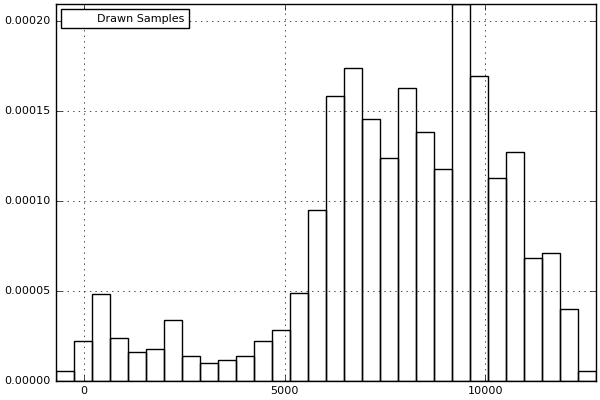

In [24]:
Plots.histogram(xs, normed=true, label="Drawn Samples", fill=false)


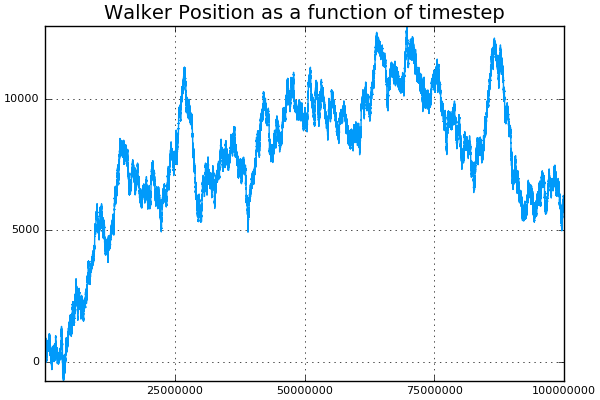

In [25]:
plot(xs, legend=false, title="Walker Position as a function of timestep")

## Problem 8 - Data inference problem from "Fitting a model to data" (http://arxiv.org/pdf/1008.4686v1.pdf) 

## Problem 9 - Replace the proposal distribution to take steps in log x instead of x.

What distribution are you sampling now?